# Project 1

In [10]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [11]:
import pandas as pd

pd.options.display.max_rows = 1000
df=pd.read_csv("https://data.cityofnewyork.us/resource/k397-673e.csv")

In [12]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [13]:
mean_value = df['base_salary'].mean()
mean_value

64803.85066

In [14]:
median_value = df['base_salary'].median()
median_value

61680.0

In [15]:
mode_value = df['base_salary'].mode()[0]
mode_value

57127.0

In [16]:
yearly_count=df.groupby("fiscal_year")["base_salary"].sum().reset_index()
yearly_count["base_salary"]=yearly_count["base_salary"]/1e6
yearly_count_filtered=yearly_count[yearly_count["fiscal_year"].isin(range(2020,2022))]
yearly_count_filtered

,fiscal_year,base_salary


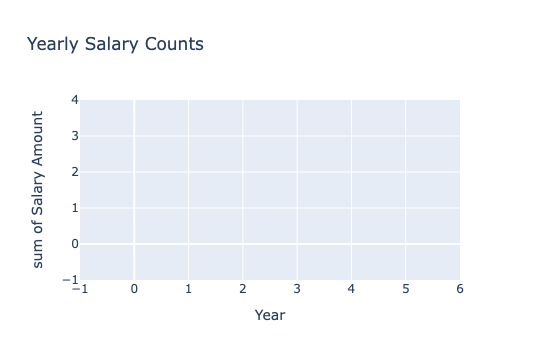

In [17]:
import plotly.express as px

fig = px.histogram(
    yearly_count_filtered, 
    x="fiscal_year", 
    y="base_salary", 
    color="fiscal_year",
    title="Yearly Salary Counts", 
    labels={"fiscal_year": "Year", "base_salary": "Salary Amount"}
)

fig.update_xaxes(tickmode='linear', dtick=1)

fig.update_layout(bargap=0.8)

Using the Python standard library 

In [5]:
import csv

salary=[]
with open("NYC_payroll_2024.csv") as file:
    reader = csv.DictReader(file)
    for row in reader:
        base_salary = float(row["Base Salary"].replace(",", "").strip())
        salary.append(base_salary)

salary

[86005.0,
 86005.0,
 86005.0,
 86005.0,
 86005.0,
 86005.0,
 94415.0,
 86005.0,
 86005.0,
 67676.0,
 236088.0,
 86005.0,
 83791.0,
 83791.0,
 73403.0,
 62306.0,
 73049.0,
 66603.0,
 67677.0,
 68751.0,
 71231.0,
 73317.0,
 67980.0,
 73049.0,
 75197.0,
 59083.0,
 66603.0,
 66603.0,
 59740.0,
 73049.0,
 66950.0,
 62310.0,
 71000.0,
 60157.0,
 67677.0,
 73049.0,
 96717.0,
 66950.0,
 66603.0,
 62306.0,
 66950.0,
 66950.0,
 66603.0,
 83791.0,
 62306.0,
 86005.0,
 67676.0,
 72100.0,
 62306.0,
 62306.0,
 53712.0,
 48601.0,
 96717.0,
 74160.0,
 59740.0,
 63860.0,
 70600.0,
 118306.0,
 83791.0,
 64454.0,
 62306.0,
 76220.0,
 62306.0,
 66603.0,
 63860.0,
 90000.0,
 68750.0,
 62377.0,
 75197.0,
 63860.0,
 70900.0,
 66603.0,
 68751.0,
 37.22,
 35.45,
 96717.0,
 59740.0,
 59740.0,
 75197.0,
 64000.0,
 184236.0,
 58000.0,
 66603.0,
 66603.0,
 66603.0,
 90737.0,
 62000.0,
 91311.0,
 151131.0,
 28.84,
 62306.0,
 93900.0,
 60156.0,
 82.0,
 88463.0,
 75197.0,
 63860.0,
 66603.0,
 100000.0,
 44290.0,
 902

In [6]:
mean_salary = sum(salary) / len(salary) if salary else 0
mean_salary

52513.43312758744

In [7]:
sorted_salary = sorted(salary)
n = len(sorted_salary)
median_salary = (sorted_salary[n // 2] if n % 2 == 1 else
                 (sorted_salary[n // 2 - 1] + sorted_salary[n // 2]) / 2) if n > 0 else 0
median_salary

50207.0

In [8]:
salary_counts = {}
for salary in sorted_salary:
    if salary in salary_counts:
        salary_counts[salary] += 1
    else:
        salary_counts[salary] = 1

max_count = max(salary_counts.values())
for val, count in salary_counts.items():
    if count == max_count:
        mode_salary = val

mode_salary

33.18

In [9]:
import csv

def calculate_yearly_salary(file_path):
    yearly_salary = {}
    with open(file_path) as file:
        reader = csv.DictReader(file)
        for row in reader:
            year = int(row["Fiscal Year"].strip())
            try:
                base_salary = float(row["Base Salary"].replace(",", "").strip())
            except ValueError:
                base_salary = 0

            if year not in yearly_salary:
                yearly_salary[year] = 0
            yearly_salary[year] += base_salary

    return yearly_salary

yearly_salary_dict = calculate_yearly_salary("NYC_payroll_2024.csv")
print(yearly_salary_dict)

{2020: 27574295079.50714, 2016: 784713.409999999, 2022: 167719536.99, 2021: 27317851866.834507, 2015: 3621945.0699999966}


In [11]:
max_length = 20
max_sum = max(yearly_salary_dict.values())

In [14]:
for year, base_salary in yearly_salary_dict.items():  
    bar_length = int((base_salary / max_sum) * max_length)
    bar_length = max(bar_length, 1)  
    bar = "*" * bar_length  
    print(f"{year}: {bar} ({base_salary:.2f})") 

2020: ******************** (27574295079.51)
2016: * (784713.41)
2022: * (167719536.99)
2021: ******************* (27317851866.83)
2015: * (3621945.07)
